In [33]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import os

In [34]:
plotting.setup_mpl()

# Define the cache directory
cache_dir = 'cache_dir'

# Create the cache directory if it doesn't exist
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

# Enable the cache
ff1.Cache.enable_cache(cache_dir)

pd.options.mode.chained_assignment = None

## Collect the data

In [35]:
# Get the schedule for the 2023 season
race = ff1.get_session(2023, "Australia", "R")
race.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '14', '18', '11', '4', '27', '81', '24', '22', '77', '55', '10', '31', '21', '2', '20', '63', '23', '16']


In [36]:
# Get the session laps
laps = race.laps

In [37]:
# Pick race drivers
laps_ric = laps.pick_driver('RIC')
laps_ver = laps.pick_driver('VER')
laps_ham = laps.pick_driver('HAM')
laps_bot = laps.pick_driver('BOT')
laps_nor = laps.pick_driver('NOR')
laps_sai = laps.pick_driver('SAI')
laps_yuk = laps.pick_driver('YUK')
laps_osc = laps.pick_driver('OSC')
laps_lec = laps.pick_driver('LEC')

In [38]:
# Analyse stint 1
laps_ric = laps_ric.loc[laps_ric["Stint"] == 1]
laps_ver = laps_ver.loc[laps_ver["Stint"] == 1]
laps_ham = laps_ham.loc[laps_ham["Stint"] == 1]
laps_bot = laps_bot.loc[laps_bot["Stint"] == 1]
laps_nor = laps_nor.loc[laps_nor["Stint"] == 1]
laps_sai = laps_sai.loc[laps_sai["Stint"] == 1]
laps_yuk = laps_yuk.loc[laps_yuk["Stint"] == 1]
laps_osc = laps_osc.loc[laps_osc["Stint"] == 1]
laps_lec = laps_lec.loc[laps_lec["Stint"] == 1]

In [39]:
# Expand the data
laps_ric["RaceLapNumber"] = laps_ric["LapNumber"] - 1
laps_ver["RaceLapNumber"] = laps_ver["LapNumber"] - 1
laps_ham["RaceLapNumber"] = laps_ham["LapNumber"] - 1
laps_bot["RaceLapNumber"] = laps_bot["LapNumber"] - 1
laps_nor["RaceLapNumber"] = laps_nor["LapNumber"] - 1
laps_sai["RaceLapNumber"] = laps_sai["LapNumber"] - 1
laps_yuk["RaceLapNumber"] = laps_yuk["LapNumber"] - 1
laps_osc["RaceLapNumber"] = laps_osc["LapNumber"] - 1
laps_lec["RaceLapNumber"] = laps_lec["LapNumber"] - 1

In [40]:
full_distance_ver_ric = pd.DataFrame()
full_distance_ver_ric = pd.DataFrame()

In [41]:
for lap in laps_ver.iterlaps():
    telemetry = lap[1].get_car_data().add_distance().add_driver_ahead()
    
    # Only run this loop when driver ahead is RIC, otherwise we compare wrong distance gaps
    telemetry = telemetry.loc[telemetry['DriverAhead'] == "3"]
    
    if len(telemetry) != 0:
        # Full distance
        lap_telemetry = telemetry[['Distance', 'DistanceToDriverAhead']]
        lap_telemetry.loc[:, 'Lap'] = lap[0] + 1

        full_distance_ver_ric = full_distance_ver_ric.append(lap_telemetry)

        # Average / median distance
        distance_mean = np.nanmean(telemetry['DistanceToDriverAhead'])
        distance_median = np.nanmedian(telemetry['DistanceToDriverAhead'])

        full_distance_ver_ric = full_distance_ver_ric.append({
            'Lap': lap[0] + 1,
            'Mean': distance_mean,
            'Median': distance_median
        }, ignore_index = True)

## Plot the data

KeyError: 'Lap'

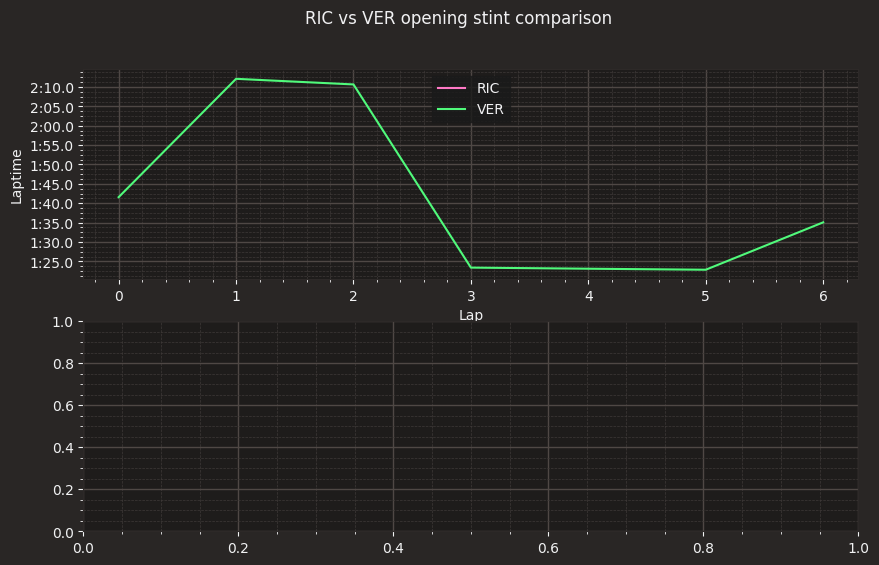

In [43]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots(2)
fig.suptitle("RIC vs VER opening stint comparison")

ax[0].plot(laps_ric['RaceLapNumber'], laps_ric['LapTime'], label='RIC')
ax[0].plot(laps_ver['RaceLapNumber'], laps_ver['LapTime'], label='VER')
ax[0].set(ylabel='Laptime', xlabel='Lap')
ax[0].legend(loc="upper center")

ax[1].plot(full_distance_ver_ric['Lap'], full_distance_ver_ric['Mean'], label='Mean', color='red')
ax[1].plot(full_distance_ver_ric['Lap'], full_distance_ver_ric['Median'], label='Median', color='grey')
ax[1].set(ylabel='Distance (meters)', xlabel='Lap')
ax[1].legend(loc="upper center")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

In [ ]:
plt.rcParams.update["figure.figsize"] = (20, 10)

fig, ax = plt.subplots()
fig.suptitle("RIC vs VER Opening Stint Comparison")

ax[0].plot(laps_ric['RaceLapNumber'], laps_ric['LapTime'], label = 'RIC', color = 'red')
ax[0].plot(laps_ver['RaceLapNumber'], laps_ver['LapTime'], label = 'VER', color = 'orange')
ax[0].set(xlabel = "Lap', ylabel = 'Lap Time (s)")
ax[0].legend(loc = 'upper center')

ax[0].plot(summarized_distance_ver_ric['Lap'], summarized_distance_ver_ric['Mean'], label = 'Mean Distance', color = 'blue')
ax[0].plot(summarized_distance_ver_ric['Lap'], summarized_distance_ver_ric['Median'], label = 'Median Distance', color = 'green')
ax[0].legend(loc = 'upper center')

#Hide x labels and tick labels
for a in ax.flat:
    a.label_outer()

plt.show()

TypeError: 'method' object does not support item assignment